# Pêndulo e caos

## Parte 1: Pêndulo simples (regime linear)

O pêndulo simples é constituído por uma haste indeformável de comprimento $\ell$ e de massa desprezível presa a um ponto em torno do qual pode rodar livremente em um plano fixo e com uma massa pontual $m$ na outra extremidade. A massa é sujeita à ação de um campo gravitacional uniforme com aceleração $g$. O grau de liberdade do pêndulo pode ser representado por um ângulo $\theta$ em relação à vertical, como na figura abaixo

![Pêndulo](./pendulum-small.png)

Como a haste é indeformável, a tensão na haste compensa a componente da força da gravidade paralela à haste. A força resultante será então a componente perpendicular à haste:

$$ F = - m g \sin \theta. $$

(O sinal negativo é devido ao fato de que a força age na direção oposta ao sentido positivo do ângulo $\theta$). Por outro lado,

$$F = m \frac{d^2\theta}{dt^2},$$

onde $dx$ é o deslocamento infinitesimal linear da massa. Este pode ser calculado como $dx = \ell d\theta$, o que nos leva a

$$ m \ell \frac{d^2\theta}{dt^2} = - m g \sin \theta,$$

resultando na conhecida equação diferencial de segunda ordem:

$$ \frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta.$$

Em princípio, como dispomos de equação diferencial que descreve o nosso modelo, seríamos capazes de, dadas as condicões inciais, calcular o comportamento futuro do pêndulo. Infelizmente, a não-linearidade introduzida pelo $\sin\theta$ do lado direito da equação impede que sejam usados os métodos conhecidos de solução de equações diferenciais.

A saída tradicional para esse dilema é usar um método perturbativo e nos preocuparmos apenas com variações pequenas em torno de um ponto conhecido. No caso, consideramos que o ângulo $\theta$ é pequeno. Neste caso, podemos aproximar

$$\sin\theta \approx \theta,$$

o que pode ser entendido lembrando a expansão de Taylor do seno:

$$\sin\theta = \theta - \frac{\theta^3}{3!} +  \frac{\theta^5}{5!} + \cdots,$$

onde vemos que para $\theta$ pequeno (próximo de zero) os termos não lineares podem ser desprezados.

Outra forma de ver isto é através de um gráfico.

/home/gonzalo/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


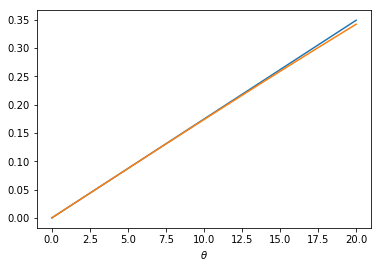

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

theta = np.linspace(0, 20, 100+1)
thetarad =  theta * np.pi / 180.
plt.plot(theta, thetarad, theta, np.sin(thetarad))
plt.xlabel(r'$\theta$')

Podemos ver que para ângulos pequenos (menores que 10°) há pouca diferença entre $\sin\theta$ e $\theta$.

A equação aproximada fica então

$$ \frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\theta$$

que é uma equação linear e pode ser resolvida por métodos tradicionais, resultando em

$$\theta(t) = \theta_0\cos(\omega_0 t - \phi),$$

onde $\theta_0$ é o ângulo inicial, $\omega_0 = \sqrt{g/\ell}$ é a denominada frequência angular natural do pêndulo e $\phi$ depende da velocidade inicial do pêndulo ($v_0 = \theta_0\sqrt{g\ell}\sin\phi$).

Abaixo estão as soluções para um pêndulo com $\ell=1$ usando $g = 9.8m/s^2$ e para alguns ângulos pequenos, sempre considerando a massa sendo largada do repouso (que resulta em $\phi=0$).

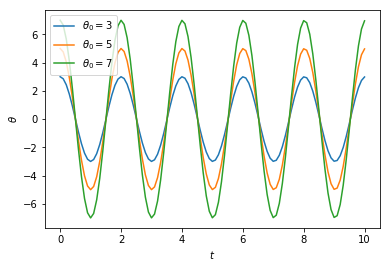

In [2]:
ell = 1.0
g = 9.8
omega0 = np.sqrt(g/ell)
t = np.linspace(0, 10, 100+1)
p3, = plt.plot(t, 3*np.cos(omega0 * t), label=r'$\theta_0 = 3$')
p5, = plt.plot(t, 5*np.cos(omega0 * t), label=r'$\theta_0 = 5$')
p7, = plt.plot(t, 7*np.cos(omega0 * t), label=r'$\theta_0 = 7$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[p3,p5,p7])

Uma atividade interessante é solucionar computacionalmente essa equação e comparar o resultado com o esperado pela solução apresentada acima.

Para isso, precisamos reescrever a equação diferencial de segundo grau como um sistema de duas equações de primeiro grau. A forma natural de fazer isto neste caso é definirmos as duas variáveis:

\begin{eqnarray}
  x & = & \theta \\
  y & = & \frac{d\theta}{dt}
\end{eqnarray}

Com isso, ficamos com o sistema de equações:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & - \frac{g}{\ell} x
\end{eqnarray}

Podemos então usar a função `odeint` do SciPy para fazer a integração das equações diferenciais, lembrando que $x_0 = \theta_0$ e $y_0 = 0$ (pois partimos do repouso).

Primeiro, definimos uma função para o cálculo das funções do lado direto do sistema, para um dado tempo e dados os valores correntes de x e y.

In [3]:
def deriv(xy, t, g, ell):
    [x, y] = xy
    return [y, - g / ell * x]

Agora basta usar essa função para resolver o sistema:

In [4]:
from scipy.integrate import odeint
theta0 = 5.0
theta0rad = 5.0 * np.pi / 180.0
t = np.linspace(0, 10, 100+1)
xy0 = [theta0rad, 0.0]
xy = odeint(deriv, xy0, t, args=(9.8, 1.0))

Agora basta plotar o resultado juntamente com a solução exata para comparação:

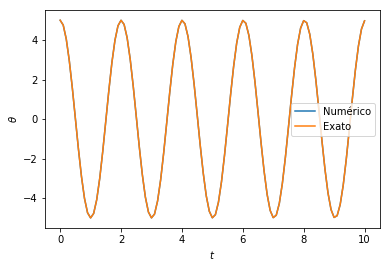

In [5]:
exato = theta0*np.cos(np.sqrt(9.8/1.0)*t)
numerico = xy[:, 0] * 180.0 / np.pi # Converte para graus
pn, = plt.plot(t, numerico, label='Numérico')
pe, = plt.plot(t, exato, label='Exato')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pe])

Não é possível distinguir visualmente entre as duas soluções, o que é um bom sinal. Vejamos a diferença entre os resultados diretamente:

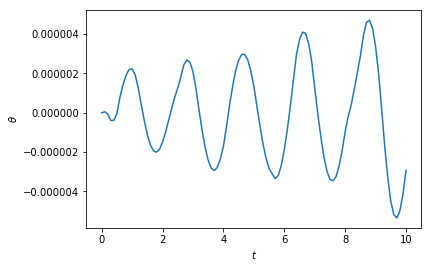

In [6]:
plt.plot(t, numerico - exato)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')

Note que, como a amplitude da oscilação é 5.0, a amplitude do erro é várias ordens de grandeza menor. No entanto, notamos uma tendência a crescimento do erro com o tempo, o que indica que a solução numérica não é confiável para intervalos de tempo grandes.

Vamos primeiramente tentar aumentar o número de intervalos simulados entre os instantes 0 e 10 para ver se isso tem algum efeito.

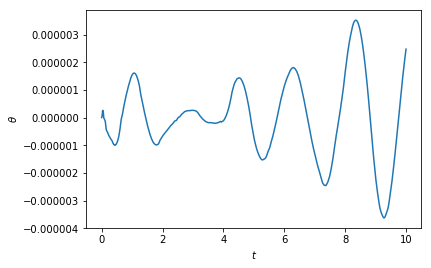

In [7]:
t = np.linspace(0, 10, 10000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv, xy0, t, args=(9.8, 1.0))
exato = 5*np.cos(np.sqrt(9.8/1.0)*t)
numerico = xy[:, 0] * 180.0 / np.pi
plt.plot(t, numerico - exato)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')

Vamos agora realizar a simulação por mais tempo:

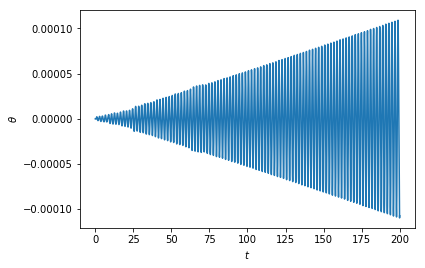

In [8]:
t = np.linspace(0, 200, 100000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv, xy0, t, args=(9.8, 1.0))
exato = 5*np.cos(np.sqrt(9.8/1.0)*t)
numerico = xy[:,0] * 180.0 / np.pi
plt.plot(t, numerico - exato)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')

Veja que há um crescimento quase linear da amplitude do erro com o tempo. Portanto, podemos avaliar, dada uma precisão aceitável, até que ponto a simulação pode ser levada adiante.

Um outro gráfico interessante é o chamado *gráfico de espaço de fase* (ou *espaço de estado*), que consiste em plotar posição contra velocidade. No nosso caso, ângulo contra velocidade angular.

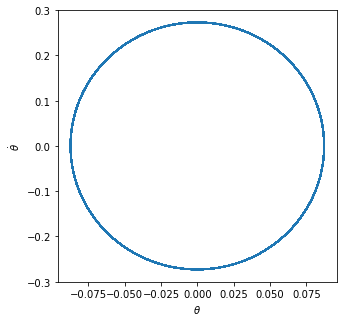

In [9]:
plt.figure(figsize=(5,5))
plt.plot(xy[:,0], xy[:,1])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')

## Parte 2: Pêndulo simples (regime não-linear)

A questão agora é a seguinte: O que acontece se o ângulo $\theta$ não é necessariamente pequeno? Neste caso, não temos uma solução exata, mas podemos usar o mesmo método para a solução numérica. Voltando à esquação original,

$$\frac{d^2\theta}{dt^2} = - \frac{g}{\ell}\sin\theta,$$

fazemos a transformação

\begin{eqnarray}
  x & = & \theta \\
  y & = & \frac{d\theta}{dt}
\end{eqnarray}

Chegando a:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & - \frac{g}{\ell} \sin x
\end{eqnarray}

Com o qual podemos montar a solução usando SciPy.

In [11]:
def deriv_nl(xy, t, g, ell):
    [x, y] = xy
    return [y, -g/ell * np.sin(x)]

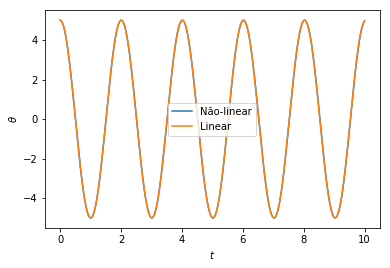

In [12]:
theta0 = 5.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_nl, xy0, t, args=(9.8, 1.0))
linear = theta0*np.cos(np.sqrt(9.8/1.0)*t)
naolinear = xy[:,0] * 180.0 / np.pi
pn, = plt.plot(t, naolinear, label='Não-linear')
pl, = plt.plot(t, linear, label='Linear')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pl])

Note como para $\theta_0$ pequeno não se vê diferença entre o sistema não-linear e o linear. Vejamos agora com um ângulo inicial maior.

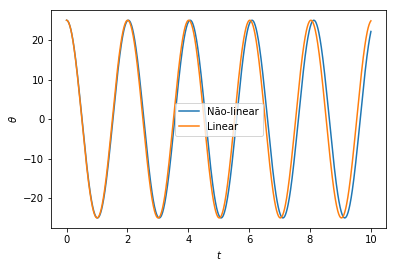

In [13]:
theta0 = 25.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_nl, xy0, t, args=(9.8, 1.0))
linear = theta0*np.cos(np.sqrt(9.8/1.0)*t)
naolinear = xy[:,0] * 180.0 / np.pi
pn, = plt.plot(t, naolinear, label='Não-linear')
pl, = plt.plot(t, linear, label='Linear')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pl])

Aqui já começamos a ver que o sistema não linearizado apresenta uma frequência menor de operação. Vejamos para um ângulo inicial ainda maior.

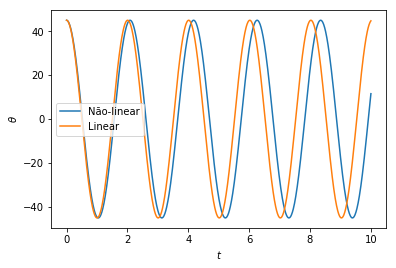

In [14]:
theta0 = 45.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_nl, xy0, t, args=(9.8, 1.0))
linear = theta0*np.cos(np.sqrt(9.8/1.0)*t)
naolinear = xy[:,0] * 180.0 / np.pi
pn, = plt.plot(t, naolinear, label='Não-linear')
pl, = plt.plot(t, linear, label='Linear')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pl])

Mantendo a tendência de diminuir a frequência com o aumento de $\theta_0$. Mais dois ângulos maiores:

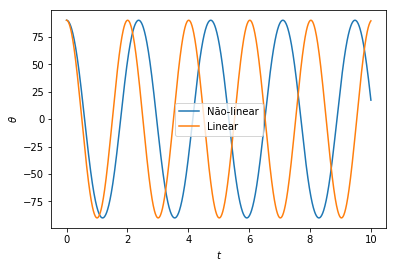

In [15]:
theta0 = 90.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_nl, xy0, t, args=(9.8, 1.0))
linear = theta0*np.cos(np.sqrt(9.8/1.0)*t)
naolinear = xy[:,0] * 180.0 / np.pi
pn, = plt.plot(t, naolinear, label='Não-linear')
pl, = plt.plot(t, linear, label='Linear')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pl])

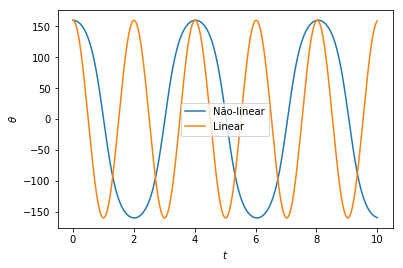

In [16]:
theta0 = 160.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_nl, xy0, t, args=(9.8, 1.0))
linear = theta0*np.cos(np.sqrt(9.8/1.0)*t)
naolinear = xy[:,0] * 180.0 / np.pi
pn, = plt.plot(t, naolinear, label='Não-linear')
pl, = plt.plot(t, linear, label='Linear')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pl])

Note como neste último caso fica também claro que o formato da onda, antes aparentemente senoidal, é dependente do ângulo inicial. Isso se deve ao fato de que, para ângulos maiores, a massa passa mais tempo próximo dos pontos mais altos (os extremos.

Fica claro que o modelo linear é completamente inadequado para descrever o sistema real, que apresenta nã-linearidade.

Para concluir esta parte, vejamos o espaço de fase do sistema não linear para este último valor de $\theta_0$:

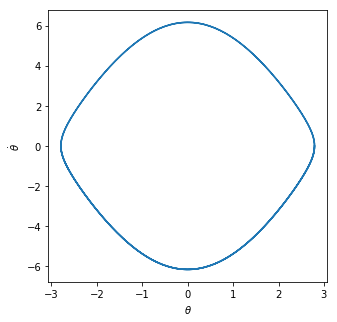

In [17]:
plt.figure(figsize=(5,5))
plt.plot(xy[:,0], xy[:,1])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')

Note como a figura não tem mais um formato circular, porém continua sendo uma figura fechada, característica de um sistema periódico (volta regularmente ao mesmo estado inicial, de onde a trajetória se repete).

## Parte 3: Atrito

Vamos agora introduzir um novo elemento no sistema. Até agora, as forças atuando nos pêndulos eram conservativas. Num pêndulo real, haverá atuação de outras forças não-conservativas, as mais importantes se referindo a atrito na junção onde o pêndulo se prende ao teto e resistência do ar. Felizmente para nosso modelamento, nas baixas velocidades típicas de um pêndulo, essas duas forças são aproximadamente proporcionais à velocidade. (Para altas velocidades a resistência do ar é proporcional ao quadrado da velocidade). Vamos então introduzir uma força da forma $-q\frac{d\theta}{dt}$, onde $q$ é um coeficiente efetivo que engloba as duas contribuições e o sinal negativo indica que a força é contrária à direção de deslocamento do pêndulo.

Ficamos então com o seguinte sistema (usando nossas coordenadas $x$ e $y$ como anteriormente):

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & -\frac{g}{\ell}\sin x - q y.
\end{eqnarray}

Esse sistema pode ser simulado como abaixo.

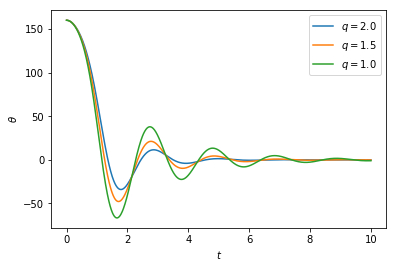

In [18]:
def deriv_at(xy, t, g, ell, q):
    [x, y] = xy
    return [y, -g/ell*np.sin(x)-q*y]
g = 9.8
ell = 1.0
theta0 = 160.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
q = 2.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
q20 = xy[:,0] * 180.0 / np.pi
p20, = plt.plot(t, q20, label=r'$q=2.0$')
q = 1.5
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
q15 = xy[:,0] * 180.0 / np.pi
p15, = plt.plot(t, q15, label=r'$q=1.5$')
q = 1.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
q10 = xy[:,0] * 180.0 / np.pi
p10, = plt.plot(t, q10, label=r'$q=1.0$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[p20, p15, p10])

Vemos que as oscilações decaem rapidamente, e mais rapidamente quanto maior o coeficiente de atrito, conforme esperado. Vejamos esses mesmos resultados no espaço de fase.

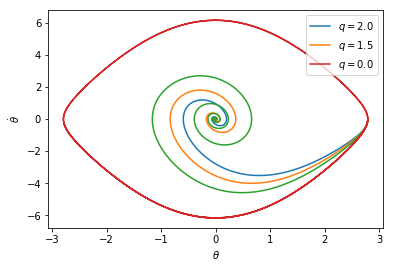

In [19]:
g = 9.8
ell = 1.0
theta0 = 160.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
q = 2.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p20, = plt.plot(xy[:,0], xy[:,1], label=r'$q=2.0$')
q = 1.5
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p15, = plt.plot(xy[:,0], xy[:,1], label=r'$q=1.5$')
q = 1.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p10, = plt.plot(xy[:,0], xy[:,1], label=r'$q=1.0$')
q = 0.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p10, = plt.plot(xy[:,0], xy[:,1], label=r'$q=0.0$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot\theta$')
plt.legend(handles=[p20, p15, p10])

As trajetórias no espaço de fase tendem rapidamente para o ponto $(0,0)$, que é o ponto de energia nula, devido à perda de energia do atrito. Um ponto para o qual as trajetórias tendem é denominado um *ponto fixo*. Para ilustração, vejamos como ficam as trajetórias caso o pêndulo seja largado do outro lado. Obviamente, com $q=0$ o sistema se reduz ao sistema sem atrito.

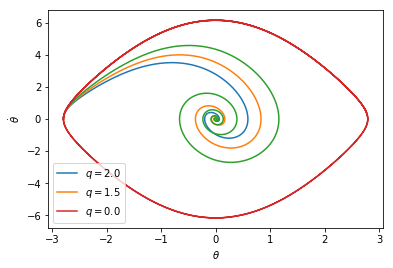

In [20]:
g = 9.8
ell = 1.0
theta0 = -160.0
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 10, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
q = 2.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p20, = plt.plot(xy[:,0], xy[:,1], label=r'$q=2.0$')
q = 1.5
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p15, = plt.plot(xy[:,0], xy[:,1], label=r'$q=1.5$')
q = 1.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p10, = plt.plot(xy[:,0], xy[:,1], label=r'$q=1.0$')
q = 0.0
xy = odeint(deriv_at, xy0, t, args=(g, ell, q))
p10, = plt.plot(xy[:,0], xy[:,1], label=r'$q=0.0$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot\theta$')
plt.legend(handles=[p20, p15, p10])

## Parte 4: Força externa

Vamos agora acrescentar um novo elemento: uma força externa atuando sobre o sistema. Para termos um comportamento mais interessante, essa força externa terá um comportamento senoidal com frequência angular $\omega_F$ e amplitude $f$ dadas, isto é, terá a forma $ f\sin(\omega_F t)$.

Noso sistema fica então:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & -\frac{g}{\ell}\sin x - q y + f \sin \omega_F t.
\end{eqnarray}

Para simular este sistema seguimos o mesmo procedimento anterior, mas iremos tomar um cuidado adicional: Como existe uma força externa além da gravidade, é possível que o pêndulo passe acima de seu ponto de origem, podendo inclusive "rodar" para o outro lado. Para manter os ângulos dentro de uma faixa específica (para facilitar os gráficos) vamos então continuamente manter os ângulos na faixa $[-\pi, \pi)$.

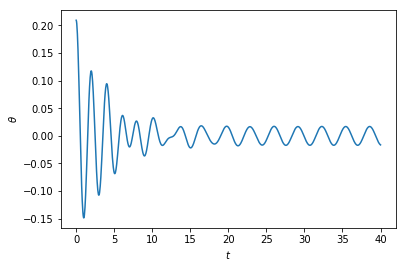

In [21]:
def deriv_f(xy, t, g, ell, q, f, wf):
    [x, y] = xy
    return [y, -g/ell*np.sin(x)-q*y+f*np.sin(wf*t)]
g = 9.8
ell = 1.0
theta0 = 12.0
f = 0.1
wf = 2.
q = 0.5
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 40, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
q15 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
p15, = plt.plot(t, q15)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')

Note como o sistema começa oscilando de acordo com a sua frequência natural, mas com o amortecimento que desgasta a energia inicialmente fornecida, passa a ser dominado pela frequência da força externa.

Vejamos alguns valores diferentes para $f$.

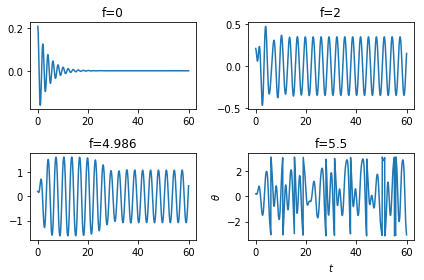

In [22]:
g = 9.8
ell = 1.0
theta0 = 12.0
wf = 2.0
q = 0.5
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 60, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
f = 0.0
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f00 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,1)
plt.title(r'f=0')
p00, = plt.plot(t, f00)
f = 2.0
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f10 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,2)
plt.title(r'f=2')
p10, = plt.plot(t, f10)
f = 4.986
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f20 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,3)
plt.title(r'f=4.986')
p20, = plt.plot(t, f20)
f = 5.5
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f40 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,4)
plt.title(r'f=5.5')
p40, = plt.plot(t, f40)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.tight_layout()

É bastante interessante ver estes resultados no espaço de fase.

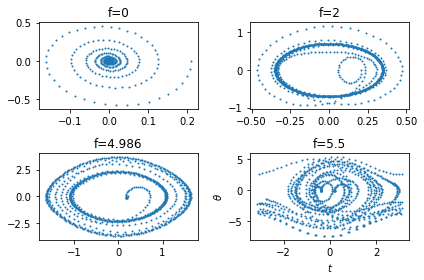

In [23]:
g = 9.8
ell = 1.0
theta0 = 12.0
wf = 2.0
q = 0.5
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 50, 1000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
f = 0.0
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f00 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,1)
plt.title(r'f=0')
p00, = plt.plot(f00, xy[:,1], 'o', markersize=1, label=r'$f=0$')
f = 2.0
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f10 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,2)
plt.title(r'f=2')
p10, = plt.plot(f10, xy[:,1], 'o', markersize=1, label=r'$f=0$')
f = 4.986
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f20 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,3)
plt.title(r'f=4.986')
p20, = plt.plot(f20, xy[:,1], 'o', markersize=1, label=r'$f=0$')
f = 5.5
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f40 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.subplot(2,2,4)
plt.title(r'f=5.5')
p40, = plt.plot(f40, xy[:,1], 'o', markersize=1, label=r'$f=0$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.tight_layout()

Aqui plotamos apenas pontos, ao invés de linhas, para evitar linhas inexistentes nos dois gráficos de baixo. O resultado à esquerda acima, usando $f=0$ se reduz aos resultados anteriores, com um ponto fixo na origem. No caso de $f=2$ já vemos um comportamento mais interessante: ao invés de um ponto-fixo, a trajetória tende ao que é denominado um ciclo-limite (tende ao ciclo de oscilação determinado pela força externa). Mas para forças maiores, o comportamento é ainda mais interessante. No caso $f=4.986$ o sistema percorre uma maior região do espaço de estado antes de chegar no ponto em que tende ao ciclo limite. No caso de $f=5.5$ não vemos tendência a um ponto fixo ou a um ciclo limite. Vamos avaliar o sistema por um tempo maior, para verificar o que ocorre.

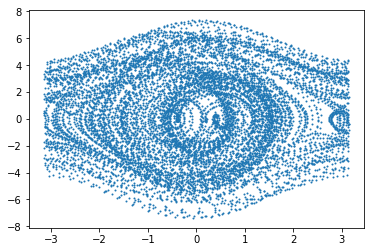

In [24]:
g = 9.8
ell = 1.0
theta0 = 12.0
wf = 2.0
q = 0.5
theta0rad = theta0 * np.pi / 180.0
t = np.linspace(0, 500, 10000+1) # Usando agora 10000 instantes de tempo no mesmo intervalo
xy0 = [theta0rad, 0.0]
f = 5.5
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
f40 = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi 
plt.plot(f40, xy[:,1], 'o', markersize=1)

Não vemos uma repetição da trajetória, ao contrário, uma ampla região do espaço de estado é explorada. 

## Parte 5: Sensibilidade a condições iniciais

Vamos agora avaliar agora um outro aspecto do sistema: Vejamos o que acontece quando o sistema se desenvolve a partir de condições iniciais ligeiramente diferentes (continuamos com velocidade inicial zero, mas variamos ligeiramente o ângulo inicial). Avaliaremos então a diferença (absoluta) entre as duas trajetórias com a passagem do tempo.

Primeiramente, para $f=2$.

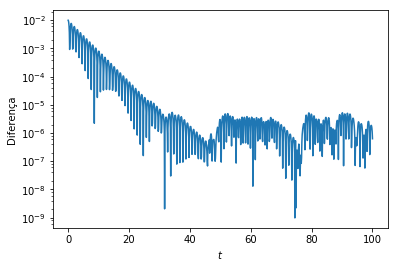

In [25]:
g = 9.8
ell = 1.0
wf = 2.0
q = 0.5
f = 0.1
deltatheta = 0.01
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
theta0prime = theta0 + deltatheta
theta0primerad = theta0prime * np.pi / 180.0
t = np.linspace(0, 100, 1000+1)
xy0 = [theta0rad, 0.0]
xy0prime = [theta0primerad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
xyprime = odeint(deriv_f, xy0prime, t, args=(g, ell, q, f, wf))
orig = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
prime = (xyprime[:, 0] + np.pi) % (2 * np.pi) - np.pi
plt.plot(t, np.abs(orig-prime) * 180. / np.pi)
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'Diferença')

Note como a diferença entre as trajetórias decai rapidamente. Na verdade, usamos a escala logaritmica no eixo das diferenças para mostrar que a queda tem tendência exponencial. Isto é,

$$ | \Delta\theta | \approx e^{\lambda t}, $$

onde $\lambda$ é negativo neste caso.

Agora vejamos o que acontece para $f=5.5$. (Para mostrar melhor o comportamento, começamos com um valor bem menor de diferença nos ângulos iniciais.)

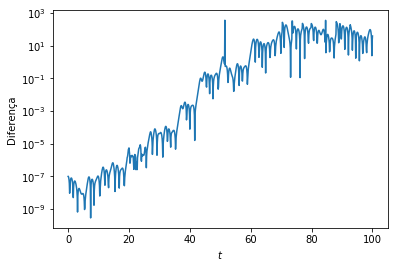

In [26]:
g = 9.8
ell = 1.0
wf = 2.0
q = 0.5
f = 5.5
deltatheta = 0.0000001
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
theta0prime = theta0 + deltatheta
theta0primerad = theta0prime * np.pi / 180.0
t = np.linspace(0, 100, 1000+1)
xy0 = [theta0rad, 0.0]
xy0prime = [theta0primerad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
xyprime = odeint(deriv_f, xy0prime, t, args=(g, ell, q, f, wf))
orig = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
prime = (xyprime[:, 0] + np.pi) % (2 * np.pi) - np.pi
plt.plot(t, np.abs(orig-prime) * 180. / np.pi)
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'Diferença')

Vemos que neste caso o comportamento é oposto: a diferença entre as trajetórias continua seguindo uma tendência da forma

$$ |\Delta\theta| \approx e^{\lambda t}, $$

mas agora o coeficiente $\lambda$ é **positivo**! Isto significa que qualquer pequena diferença nas condições inciais será amplificada rapidamente, resultando em que o comportamento do sistema é na prática impossível de prever, visto que não é possível uma precisão perfeita na determinação das condições iniciais. Esta é uma característica dos sistemas denominados **caóticos**.

## Parte 6: Seção de Poincaré

Uma técnica útil na análise de sistemas dinâmicos é a denominada *seção de Poincaré*, ou *mapa de Poincaré*, que é essencialmente a interseção de uma trajetória no espaço de fase com um espaço de menor dimensão específico.

O subespaço a escolher depende do sistema e da análise desejada. No nosso caso, vamos plotar apenas os pontos que correspondem a instantes que satisfazem a relação $\omega_F t = 2n\pi$ onde $n$ é um inteiro. Isto é, estamos plotando apenas os pontos onde a trajetória está em fase com a força externa aplicada. Devido às aproximações numéricas, devemos na verdade plotar um ponto se ele satisfizer $|t - 2n\pi/\omega_F| < \Delta t/2$ para algum valor de $\Delta t$ apropriado.

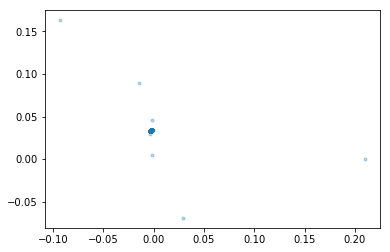

In [27]:
g = 9.8
ell = 1.0
wf = 2.0
Tf = 2.0 * np.pi / wf
q = 0.5
f = 0.1
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
Nintervals = 100000
Ttotal = 5000
delta_t = Ttotal/Nintervals
t = np.linspace(0, Ttotal, Nintervals+1)
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
traj = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
selected = np.abs(np.mod(t+Tf/2, Tf) - Tf/2) < delta_t/2
plt.plot(traj[selected], xy[selected,1], 'o', markersize=3, alpha=0.3)

Note como, com exceção de um ponto do transiente inicial, os pontos agora se acumulam em um mesmo local. A razão é simples: depois do transiente inicial, o sistema assume uma trajetória periódica de acordo com a frequência da força externa, e portanto, se olhamos a intervalos determinados pelo período dessa oscilação, encontraremos o pêndulo sempre no mesmo ponto.

Vejamos agora o que acontece no caso caótico.

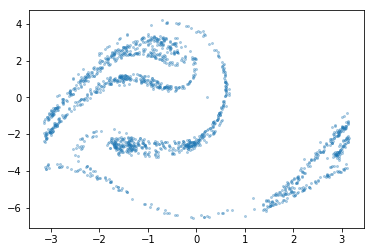

In [28]:
g = 9.8
ell = 1.0
wf = 2.0
Tf = 2.0 * np.pi / wf
q = 0.5
f = 5.5
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
Nintervals = 100000
Ttotal = 5000
delta_t = Ttotal/Nintervals
t = np.linspace(0, Ttotal, Nintervals+1)
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
traj = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
selected = np.abs(np.mod(t+Tf/2, Tf) - Tf/2) < delta_t/2
plt.plot(traj[selected], xy[selected,1], 'o', markersize=2, alpha=0.3)

O que acontece se deixamos o sistema executar por mais tempo?

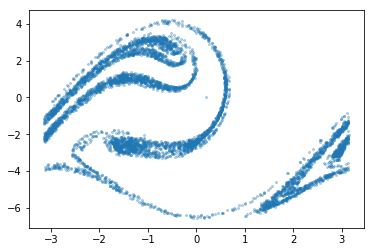

In [29]:
g = 9.8
ell = 1.0
wf = 2.0
Tf = 2.0 * np.pi / wf
q = 0.5
f = 5.5
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
Nintervals = 400000
Ttotal = 20000
delta_t = Ttotal/Nintervals
t = np.linspace(0, Ttotal, Nintervals+1)
xy0 = [theta0rad, 0.0]
xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
traj = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
selected = np.abs(np.mod(t+Tf/2, Tf) - Tf/2) < delta_t/2
plt.plot(traj[selected], xy[selected,1], 'o', markersize=2, alpha=0.3)

Note como o formato ficou o mesmo. Quer dizer, apesar de toda a característica caótica do sistema, ele é atraído a uma região específica do espaço de estado, denominado um **atrator**. A estrutura dos atratores no regime caótico é bastante complexa, tendo dimensionalidades fracionárias (o número de dimensões do espaço do atrator não é um número inteiro), e portanto são denominados **fractais** e os atratores fractais de **atratores estranhos**.

## Parte 7: Duplicação de período

Vamos analisar o regime estacionário para diferentes parâmetros de amplitude da força externa ($f$). Note que para $f=1.35$, no regime estacionário a oscilação tem um período igual ao da força externa (no caso dos parâmetros usados, $T_F = 9\pi$.

Já para $f=1.44$, os picos oscilam alternadamente de altura, o que significa que o període de repetição é dobrado. Para $f=1.465$ temos 4 picos de valores diferentes antes da repetição, o que implica um período quadruplicado em relação ao original. Esse processo de duplicação se repete indefinidamente, com intevalos entre os valores de $f$ para a duplicação cada vez menores, até que chegamos no regime caótico. Essa **duplicação de período** é típica em sistemas caóticos.

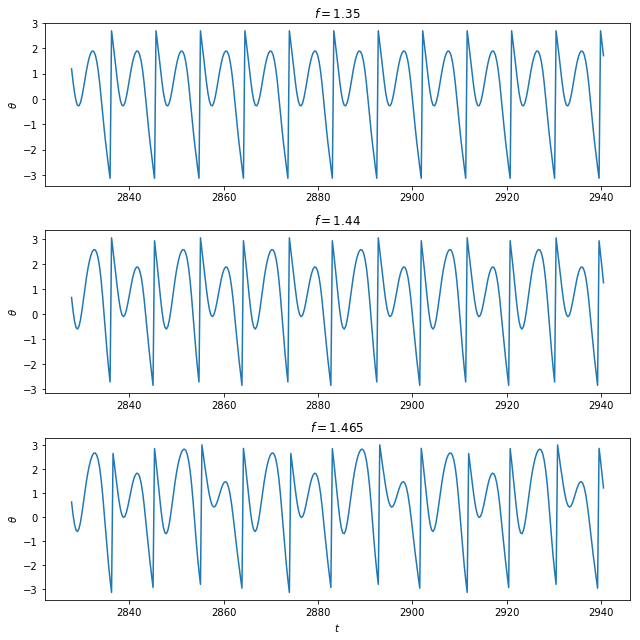

In [30]:
g = 9.8
ell = 9.8
wf = 2.0/3.0
q = 0.5
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
Tf = 2 * np.pi / wf
Ncycles = 312
Ncycles_discard = 300
samples_per_cycle = 30
Ttotal = Ncycles*Tf
Nsamples = Ncycles * samples_per_cycle
Ndiscard = Ncycles_discard * samples_per_cycle
t = np.linspace(0, Ttotal, Nsamples+1)
xy0 = [theta0rad, 0.0]
ip = 1
plt.figure(figsize=(9,9))
for f in [1.35, 1.44, 1.465]:
    xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
    traj = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
    nontrans = traj[np.arange(Nsamples+1) > Ndiscard]
    tnontrans = t[np.arange(Nsamples+1) > Ndiscard]
    plt.subplot(3,1,ip)
    plt.plot(tnontrans, nontrans)
    plt.ylabel(r'$\theta$')
    plt.title(r'$f='+str(f)+r'$')
    ip += 1
plt.xlabel(r'$t$')
plt.tight_layout()

Uma forma tradicional de analisar o processo de duplicação de período na transição para o caos é através da construção de um **diagrama de bifurcação** para analisarmos os pontos onde a duplicação de período ocorrem.

Para o nosso sistema usamos a mesma técnica da seção de Poincaré para extrair os pontos em fase com força externa e plotamos, para cada valor de $f$, todos os valores encontrados nesses pontos dentro do regime estacionário.

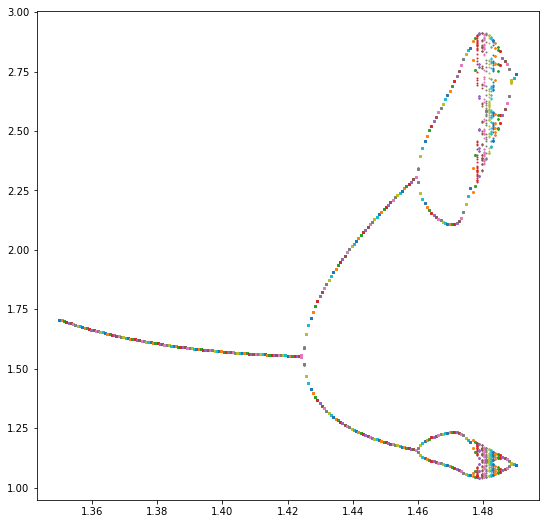

In [31]:
g = 9.8
ell = 9.8
wf = 2.0/3.0
q = 0.5
theta0 = 12.0
theta0rad = theta0 * np.pi / 180.0
fs = np.linspace(1.35, 1.49, 200+1)
Tf = 2 * np.pi / wf
Ncycles = 400
Ncycles_discard = 300
samples_per_cycle = 30
delta_t = Tf / samples_per_cycle
Ttotal = Ncycles*Tf
Nsamples = Ncycles * samples_per_cycle
Ndiscard = Ncycles_discard * samples_per_cycle
t = np.linspace(0, Ttotal, Nsamples+1)
xy0 = [theta0rad, 0.0]
plt.figure(figsize=(9,9))
for f in fs:
    xy = odeint(deriv_f, xy0, t, args=(g, ell, q, f, wf))
    traj = (xy[:, 0] + np.pi) % (2 * np.pi) - np.pi
    selected = np.abs(np.mod(t+Tf/2, Tf)-Tf/2) < delta_t/2
    nontrans = traj[selected & (np.arange(Nsamples+1) > Ndiscard) ]
    plt.plot(f*np.ones(np.size(nontrans)), nontrans, 'o', markersize=1)

Note como até um pouco acima de $f=1.42$ a trajetória atinge sempre o mesmo ponto (para um dado $f$). Por volta de $f=1.43$ já são atingidos dois pontos distintos. Isso é uma marca de que o período de oscilação é o dobro do período de amostragem. Por volta de $f=1.46$ há uma nova duplicação (cada um dos pontos anteriores é dividido em dois). Um pouco acima de $f=1.47$ há outra duplicação (não há detalhes suficientes para visualização no diagrama acima).